In [ ]:
# KNN Classification with Decision Boundary Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset shape:", X.shape)
print("Target classes:", data.target_names)

Dataset shape: (150, 4)
Target classes: ['setosa' 'versicolor' 'virginica']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
k_values = range(1, 21, 15)
train_acc, test_acc = [], []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_acc.append(knn.score(X_train_scaled, y_train))
    test_acc.append(knn.score(X_test_scaled, y_test))


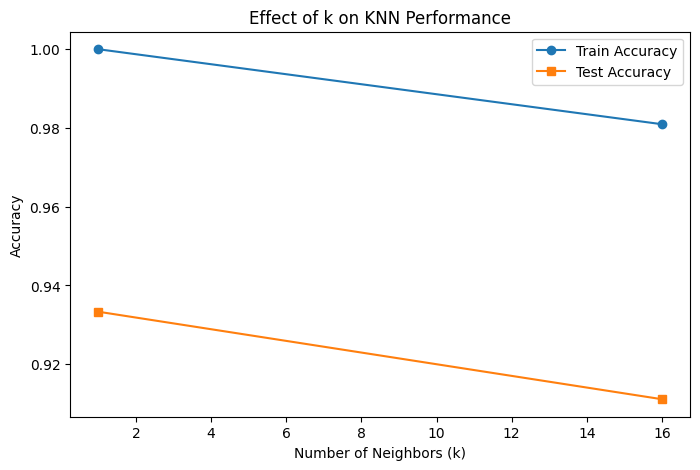

In [7]:
plt.figure(figsize=(8,5))
plt.plot(k_values, train_acc, label="Train Accuracy", marker="o")
plt.plot(k_values, test_acc, label="Test Accuracy", marker="s")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Effect of k on KNN Performance")
plt.legend()
plt.show()

In [8]:
best_k = k_values[np.argmax(test_acc)]
print("Best k:", best_k)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Test Accuracy (k={}):".format(best_k), accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))



Best k: 1
Test Accuracy (k=1): 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



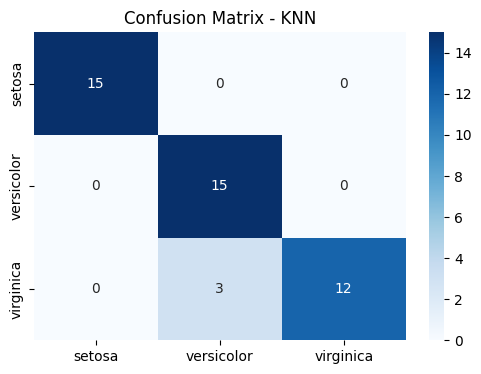

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", 
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix - KNN")
plt.show()

In [10]:
X_2d = X.iloc[:, :2].values
y_2d = y.values

In [11]:
# Train-test split again for 2D features
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y_2d, test_size=0.3, random_state=42, stratify=y_2d
)


In [12]:
# Scale
scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled = scaler_2d.transform(X_test_2d)

In [13]:
# Train KNN with best k
knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train_2d_scaled, y_train_2d)

KNeighborsClassifier(n_neighbors=1)

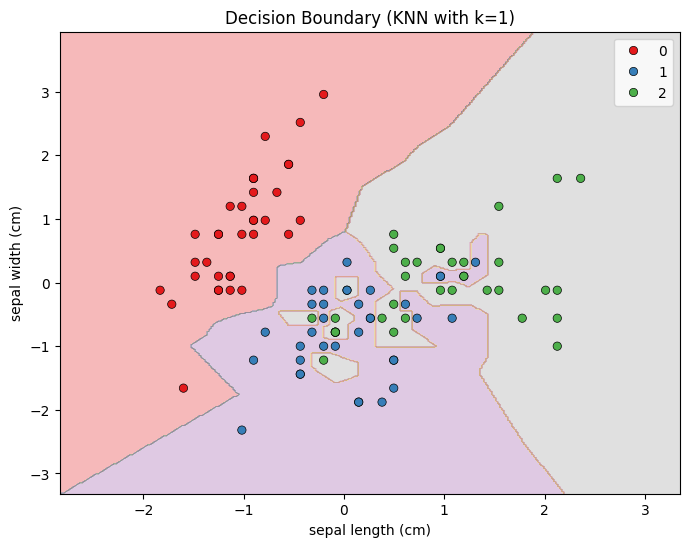

In [14]:
# Plot decision boundary
h = 0.02
x_min, x_max = X_train_2d_scaled[:, 0].min() - 1, X_train_2d_scaled[:, 0].max() + 1
y_min, y_max = X_train_2d_scaled[:, 1].min() - 1, X_train_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
sns.scatterplot(x=X_train_2d_scaled[:,0], y=X_train_2d_scaled[:,1], hue=y_train_2d, palette="Set1", edgecolor="k")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Decision Boundary (KNN with k={})".format(best_k))
plt.show()


In [15]:
print("Task6 completed")

Task6 completed
